## Análisis de Datos Meteorológicos con una API Pública
Obtener datos del clima de una ciudad usando la API de Open-Meteo (https://open-meteo.com/) y analizar la temperatura.

* Haz una petición a la API para que devuelva el pronóstico de las temperaturas para una semana en Bilbao. El parámetro correspondiente es `temperature_2m` además de la latitud y la longitud.
* Procesa la respuesta en formato JSON para obtener dos listas: una con la lista de temperaturas y otra con las fechas-horas correspondientes.
* Crea un DataFrame con esas dos columnas: `Hora` y `Temperatura`
* Elige la gráfica adecuada y visualiza el pronóstico de temperaturas.

Para crear la variable `Hora` del DataFrame puedes introducir directamente la lista que se obtiene del campo `data["hourly"]["time"]` o procesar esa lista mediante el siguiente código:

`hours = pd.date_range(start=lista_de_horas, periods=len(temps), freq="H")`

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime as dt
import seaborn as sns

In [18]:
import requests


# Coordenadas de Bilbao
latitude = 43.26271
longitude = -2.92528


url = f"https://api.open-meteo.com/v1/forecast?"  # Aquí vienen el resto de los parámetros




In [19]:
response = requests.get(url)
response

<Response [200]>

In [23]:
extra = "latitude=43.26271&longitude=-2.92528&hourly=temperature_2m"
url_full = url + extra

In [24]:
response = requests.get(url_full)
response

<Response [200]>

In [26]:
def forecast(url):
    response = requests.get(url)

    if response.status_code == 200:  # Código 200 indica una respuesta exitosa.
        data = response.json()  # Analizar la respuesta JSON.
        return data
    else:
        print("Error en la solicitud: ", response.status_code)

In [27]:
forecast(url_full)

{'latitude': 43.26,
 'longitude': -2.9300003,
 'generationtime_ms': 0.05698204040527344,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 21.0,
 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'},
 'hourly': {'time': ['2025-03-27T00:00',
   '2025-03-27T01:00',
   '2025-03-27T02:00',
   '2025-03-27T03:00',
   '2025-03-27T04:00',
   '2025-03-27T05:00',
   '2025-03-27T06:00',
   '2025-03-27T07:00',
   '2025-03-27T08:00',
   '2025-03-27T09:00',
   '2025-03-27T10:00',
   '2025-03-27T11:00',
   '2025-03-27T12:00',
   '2025-03-27T13:00',
   '2025-03-27T14:00',
   '2025-03-27T15:00',
   '2025-03-27T16:00',
   '2025-03-27T17:00',
   '2025-03-27T18:00',
   '2025-03-27T19:00',
   '2025-03-27T20:00',
   '2025-03-27T21:00',
   '2025-03-27T22:00',
   '2025-03-27T23:00',
   '2025-03-28T00:00',
   '2025-03-28T01:00',
   '2025-03-28T02:00',
   '2025-03-28T03:00',
   '2025-03-28T04:00',
   '2025-03-28T05:00',
   '2025-03-28T06:00',
   '2025-03-28T07:0

In [32]:
meteo = pd.DataFrame(forecast(url_full))
meteo["hourly"]

time              [2025-03-27T00:00, 2025-03-27T01:00, 2025-03-2...
temperature_2m    [10.7, 10.8, 11.0, 10.6, 10.8, 10.4, 10.5, 10....
Name: hourly, dtype: object

In [60]:
meteo["hourly"]["time"][0].split("T")[1]

'00:00'

In [ ]:
hours = pd.date_range(start=meteo["hourly"]["time"], periods=len(temps), freq="H")

In [55]:
meteo_dict = {
    "hora": meteo["hourly"]["time"],
    "temperatura":meteo["hourly"][1]
}

meteo_dict
    

        
    

C:\Users\pacof\AppData\Local\Temp\ipykernel_12592\3275043519.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "temperatura":meteo["hourly"][1]


{'hora': ['2025-03-27T00:00',
  '2025-03-27T01:00',
  '2025-03-27T02:00',
  '2025-03-27T03:00',
  '2025-03-27T04:00',
  '2025-03-27T05:00',
  '2025-03-27T06:00',
  '2025-03-27T07:00',
  '2025-03-27T08:00',
  '2025-03-27T09:00',
  '2025-03-27T10:00',
  '2025-03-27T11:00',
  '2025-03-27T12:00',
  '2025-03-27T13:00',
  '2025-03-27T14:00',
  '2025-03-27T15:00',
  '2025-03-27T16:00',
  '2025-03-27T17:00',
  '2025-03-27T18:00',
  '2025-03-27T19:00',
  '2025-03-27T20:00',
  '2025-03-27T21:00',
  '2025-03-27T22:00',
  '2025-03-27T23:00',
  '2025-03-28T00:00',
  '2025-03-28T01:00',
  '2025-03-28T02:00',
  '2025-03-28T03:00',
  '2025-03-28T04:00',
  '2025-03-28T05:00',
  '2025-03-28T06:00',
  '2025-03-28T07:00',
  '2025-03-28T08:00',
  '2025-03-28T09:00',
  '2025-03-28T10:00',
  '2025-03-28T11:00',
  '2025-03-28T12:00',
  '2025-03-28T13:00',
  '2025-03-28T14:00',
  '2025-03-28T15:00',
  '2025-03-28T16:00',
  '2025-03-28T17:00',
  '2025-03-28T18:00',
  '2025-03-28T19:00',
  '2025-03-28T20:00',
  

In [40]:
meteodf = pd.DataFrame(meteo_dict)
meteodf

,hora,temperatura
0,2025-03-27T00:00,10.7
1,2025-03-27T01:00,10.8
2,2025-03-27T02:00,11.0
3,2025-03-27T03:00,10.6
4,2025-03-27T04:00,10.8
...,...,...
163,2025-04-02T19:00,18.3
164,2025-04-02T20:00,15.7
165,2025-04-02T21:00,13.7
166,2025-04-02T22:00,12.6


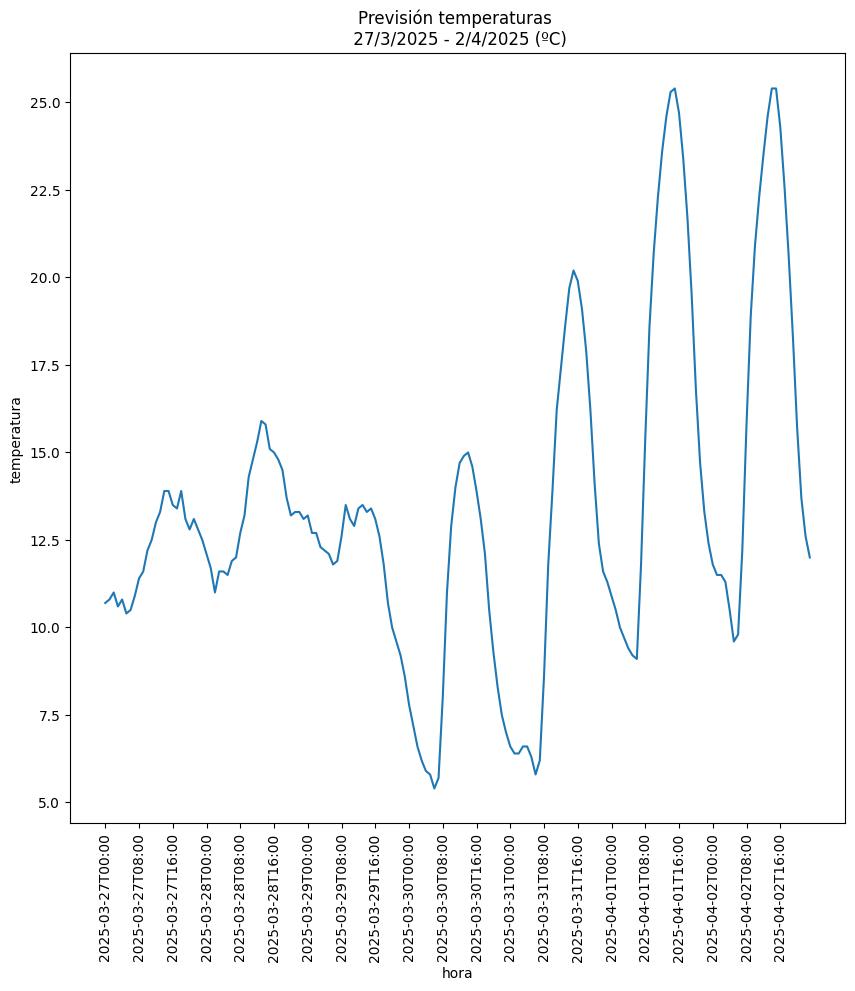

In [86]:
plt.figure(figsize=(10,10))
sns.lineplot(data = meteodf,x = "hora", y = "temperatura")
plt.xticks(meteodf["hora"][::8],rotation = "vertical")
plt.title("Previsión temperaturas \n 27/3/2025 - 2/4/2025 (ºC)");
